In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import time

In [2]:
time0 = time.time()

In [3]:
#Getting the Data
(x_train,Y_train),(x_test,Y_test) = tf.keras.datasets.mnist.load_data()

# Plotting an image

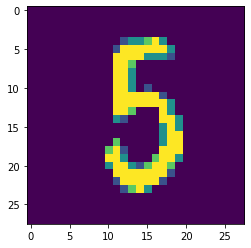

In [4]:
plt.imshow(x_train[5678])

# Processing the Data

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
Y_train = Y_train.reshape(Y_train.shape[0],1)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
Y_test = Y_test.reshape(Y_test.shape[0],1)

In [7]:
Classes = 10
#Converting into One Hot Vector
y_train = np.zeros([Y_train.shape[0], Classes])
for i in range(Y_train.shape[0]):
        y_train[i][Y_train[i]] = 1

y_test = np.zeros([Y_test.shape[0], Classes])
for i in range(Y_test.shape[0]):
        y_test[i][Y_test[i]] = 1

# Defining the Network 

In [8]:
C = 0.5

In [9]:
Sample_Size = x_train.shape[1] # 784 
Hidden_Nodes = 8000

Win = np.random.normal(size=[Sample_Size, Hidden_Nodes])
Bin = np.random.normal(size=Hidden_Nodes)

In [10]:
print('Input Weight shape: ', Win.shape)

Input Weight shape:  (784, 8000)


In [11]:
def Fully_Connected_Layer(X):
    fc = X @ Win
    fc = fc + Bin
    fc = np.maximum(fc, 0, fc) # ReLU
    return fc

In [12]:
X = Fully_Connected_Layer(x_train)
#Pseudo Inverse Calculation
#Transposing
Xt = np.transpose(X)
#Adding constraint 
S = Xt @ X
S = S + (1/C)
#Inverse Calculation
Si = np.linalg.inv(S)
#Getting Target 
B = Xt @ y_train

In [13]:
#Caluculating output weights
Wout = Si @ B
print('Output weights shape: ', Wout.shape)

Output weights shape:  (8000, 10)


In [14]:
def Predict(X):
    X = Fully_Connected_Layer(X)
    Y = X @ Wout
    return Y

# Passing Testing data through the network

In [15]:
Y = Predict(x_test)
Y1 = Predict(x_train)

#Getting Testing Accuracy
correct = 0
total = Y.shape[0]
for i in range(total):
    predicted = np.argmax(Y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
     
#Getting Training Accuracy
correct1 = 0
total1 = Y1.shape[0]
for i in range(total1):
    predicted = np.argmax(Y1[i])
    test = np.argmax(y_train[i])
    correct1 = correct1 + (1 if predicted == test else 0)

In [16]:
#Printing Test accuracy
print('Test accuracy is :', '{:.2f}'.format(correct/total*100))
#Printing training accuracy
print('Train accuracy is :', '{:.2f}'.format(correct1/total1*100))

Test accuracy is : 97.56
Train accuracy is : 99.03


In [17]:
time1 = time.time()

In [18]:
print("Time taken = ", '{:.3f}'.format((time1-time0)/60), "minutes")

Time taken =  0.615 minutes


# Visualizing Predictions

In [19]:
Predicted = np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    Predicted[i] = np.argmax(Y[i][:])

Expected = np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    Expected[i] = np.argmax(y_test[i][:])
    
for i in range(Y.shape[0]):
    if Predicted[i] == Expected[i]:
        same = i
    else:
        diff = i
        break    

In [20]:
test_image = x_test.reshape(x_test.shape[0], 28, 28)

Predicted =  7.0
Expected =  7.0


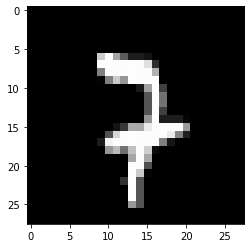

In [21]:
print("Predicted = ", Predicted[same])
print("Expected = ", Expected[same])
plt.imshow(test_image[same], cmap = 'gray')

Predicted =  9.0
Expected =  4.0


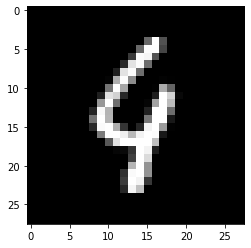

In [22]:
print("Predicted = ", Predicted[diff])
print("Expected = ", Expected[diff])
plt.imshow(test_image[diff], cmap = 'gray')

References for understanding ELM coding was taken from:
https://www.kaggle.com/robertbm/extreme-learning-machine-example